# Our first machine learning model: Logistic Regression

In [4]:
# Import our libraries 

# dataframe manipulation
import pandas as pd

# to deal with arrays
import numpy as np

# visualizations
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

# ML modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Import and inspect the Titanic dataset.
* Load the titanic data set into a pandas dataframe.

In [17]:
# Load the titanic data set into a pandas dataframe.
df = pd.read_csv("data/titanic.csv")

## Data dictionary
<img src='https://miro.medium.com/max/1260/1*rr3UGlpEv_PSMc1pyqa4Uw.png'>

# Identify which columns have null values. 
Inspect which varibles may be good / not good for using as features based on null values. 


In [18]:
# Identify which columns have null values. 
df.isna().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

# Check to see if our data has any duplicate rows.
If so, remove the duplicates.

In [19]:
# Check to see if our data has any duplicate rows.
df.duplicated().sum()

0

# Use sns.pariplot to visualize.
* Set the hue='survived'.

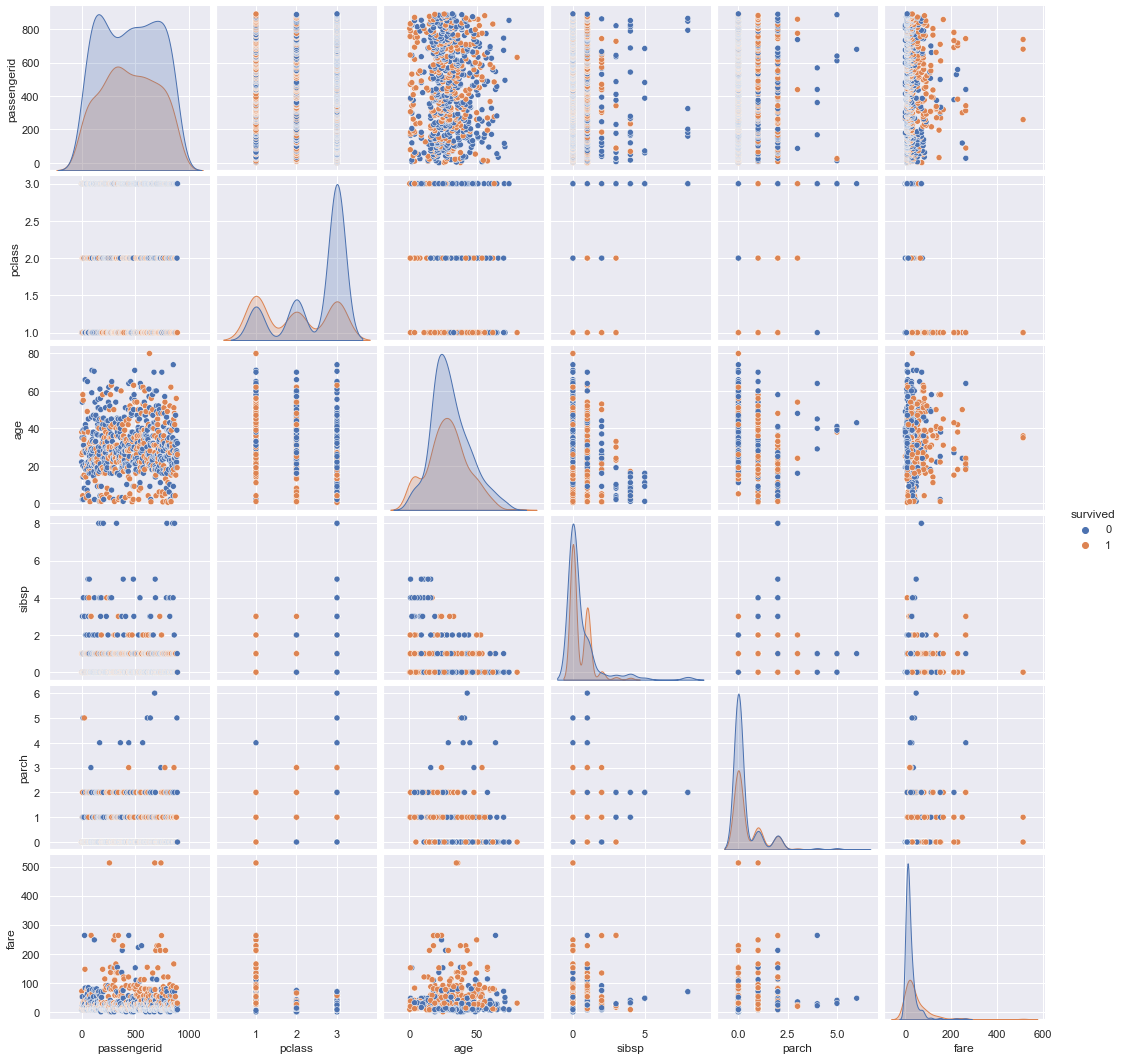

In [9]:
# Use sns.pariplot to visualize.
sns.pairplot(df, hue = "survived")

# Feature Engineering
For your first model, only include use the `fare` and `sex` as features.
* Convert the `sex` feature to a continuous value by using `pd.get_dummies()`.
* Drop the `sex_female` column as it is the identical inverse of `sex_male`. 
    * Hint, you can use `drop_first=True` in the `pd.get_dummies()` function to have this done automatically.
* Create a `selected_features` variable that is a list of `fare` and `sex_male`.  
* Define your X and y variables.
    * `X` is your selected features
    * `y` is your target features (survived). 
* Split your data into training and testing groups by using `train_test_split()`
    * __IMPORTANT: In `train_test_split` set `random_state=45`, so when you make another model, you can run it on the same random split of data.__

In [20]:
# Convert the sex column into a continuous variable by using pd.get_dummies
df = pd.get_dummies(df, columns = ["sex"], drop_first = True)
df.head()

,passengerid,survived,pclass,name,age,sibsp,parch,ticket,fare,cabin,embarked,sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


# Select our features 
   * only include use the `fare` and `sex_male` as features for this model.

In [21]:
# Select our features
selected_features = ["fare", "sex_male"]

# Set X to be the features we are going to use.
X = df[selected_features].values

# Set y to be our target variable. 
y = df["survived"].values

# Split our data into the testing and training groups. 

In [22]:
# Split our data into testing and training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)

# Print the length and width of our testing data.
print(X_train.shape, X_test.shape)

(712, 2) (179, 2)


# Build and train your model
* Initialize an empty Logistic Regression model. 
* Fit your model with your training data. 
* Predict the values of your testing data

In [23]:
# Initalize our model
model = LogisticRegression()

# Train our model using our training data.
model.fit(X_train, y_train)


LogisticRegression()

# Evaluate your model
1. Make predictions of your test data and save them as `y_pred`. 
1. Calculate and print the accuracy, precision, recall, and f1 scores of your model.
    * Hint, sklearn provides helper functions for this.
1. Plot the confusion matrix of your predicted results. 
    * How many True Positives and True Negatives did your model get?

In [24]:
# 1. Make predictions of your test data and save them as `y_pred`. 
y_pred = model.predict(X_test)

In [25]:
# 2. Calculate and print the accuracy, precision, recall, and f1 scores of your model.

# Calculate our accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate our precision score
precision = precision_score(y_test,y_pred)

# Calculate our recall score
recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

# Print each of our scores to inspect performance.
print("Accuracy Score: %f" % accuracy)
print("Precision Score: %f" % precision)
print("Recall Score: %f" % recall)
print('F1 Score %f' % f1)

Accuracy Score: 0.793296
Precision Score: 0.728814
Recall Score: 0.671875
F1 Score 0.699187


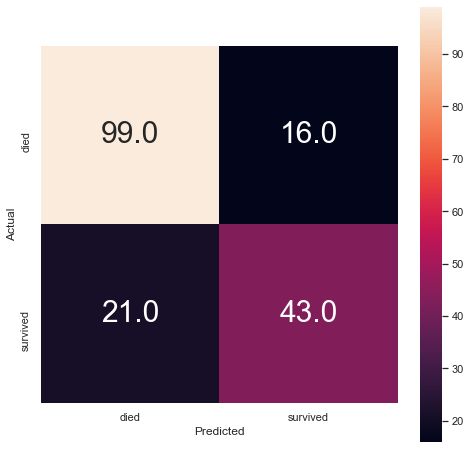

In [26]:
# 1. Plot a confusion matrix of your predicted results. 
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(8,8))


cm = confusion_matrix (y_test, y_pred)
hm = sns.heatmap(cm, annot = True, annot_kws={"size": 30},fmt= '.1f', square = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

labels = ["died", "survived"]
hm.set_xticklabels(labels)
hm.set_yticklabels(labels);

In [27]:
# How many True Positives and True Negatives did your model get?
tn,fp,fn,tp = cm.ravel()

print('true-negitive:', tn, 
      '\nfalse-positive:', fp, 
      '\nfalse-negative:', fn, 
      '\ntrue-positive:', tp )

true-negitive: 99 
false-positive: 16 
false-negative: 21 
true-positive: 43


# Create another model, call this `model_2`.  This time also include the p_class and embarked features. 
1. Run `pd.get_dummies()` on pclass and embarked of your DataFrame.
1. Update your `selected_features` to include the new pclass, embarked, sibsp, and parch features.
1. Define your `X` and `y` variables.
1. Break your data into training and testing groups.
    * __IMPORTANT, In `train_test_split` set `random_state=45` so we will be using the same data rows as our first model__.
1. Initialize a new model, call this one `model_2`
1. Fit / Train your new model
1. Make predictions of your test data and save them as `y_pred`. 
1. Calculate and print the accuracy, precision, recall, and f1 scores of your model.
1. Plot the confusion matrix of your predicted results. 
    * How many True Positives and True Negatives did your model get?
    
Compare the results to your first model. Which model had a better accuracy, recall, precision, and f1 score.

In [48]:
df = pd.read_csv ('data/titanic.csv')

In [49]:
df['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [50]:
# Run pd.get_dummies on pclass and embarked of your DataFrame.
df = pd.get_dummies(df, columns = ["pclass", "embarked", "sex"], drop_first = True) # also include column:sex here
df.head()

,passengerid,survived,name,age,sibsp,parch,ticket,fare,cabin,pclass_2,pclass_3,embarked_Q,embarked_S,sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,1,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,1,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,1,1


In [68]:
# Update your `selected_features` to include the new pclass and embarked features. 

selected_features = ['fare', 'sex_male', 'pclass_2', 'pclass_3', 'embarked_Q', 'embarked_S', 'sibsp', 'parch']
#selected_features.extend(['pclass_2', 'pclass_3', 'embarked_Q', 'embarked_S', 'sibsp', 'parch']) # if selected_features already has ['fare', 'sex_male']



In [86]:
# Define your X and y variables
X = df[selected_features].values
y = df["survived"].values

In [87]:
# Split our data into testing and training.
# !!! Remeber to use the same random state as you used before

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 23) # splits into 4 arrays beacuse X and y are arrays as well

In [88]:
# Initalize our model_2
model_2 = LogisticRegression()

In [90]:
# Fit / Train our model using our training data.
model_2.fit(X_train, y_train);

C:\Users\Tashi Nyangmi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [91]:
# Make new predicitions using our testing data. 
y_pred = model_2.predict(X_test)

Accuracy Score: 0.798206
Precision Score: 0.726027
Recall Score: 0.679487
F1 Score 0.701987


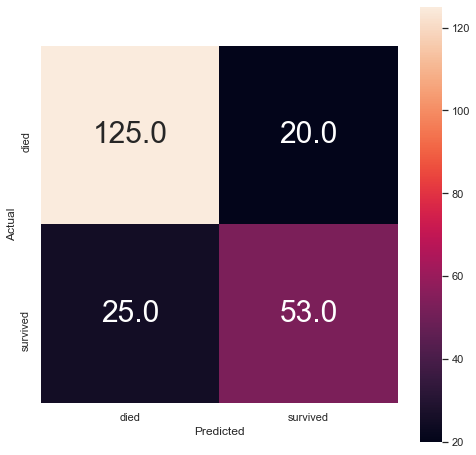

In [107]:
# Calculate our accuracy
accuracy_2 = accuracy_score(y_test, y_pred)

# Calculate our precision score
precision_2 = precision_score(y_test, y_pred)

# Calculate our recall score
recall_2 = recall_score(y_test, y_pred)

# Calculate your f1-score
f1_2 = f1_score(y_test, y_pred)

# Print each of our scores to inspect performance.
print("Accuracy Score: %f" % accuracy_2)
print("Precision Score: %f" % precision_2)
print("Recall Score: %f" % recall_2)
print('F1 Score %f' % f1_2)

# Plot your confusion matrix.

cm = confusion_matrix(y_test, y_pred)
#tn, fp, tn, tp = confustion_matrix(y_test, y_pred).ravel()


fig = plt.figure(figsize=(8,8))
hm = sns.heatmap(cm, annot = True, annot_kws={"size": 30},fmt= '.1f', square = True)

plt.xlabel('Predicted')
plt.ylabel('Actual');

hm.set_xticklabels(['died', 'survived'])
hm.set_yticklabels(['died', 'survived']);

# EXTRA CREDIT
* Use age as a feature. 
* How will you fill the null values?
    * Hint, use `df.age.fillna(???)`
* Make a new feature that 'traveled_alone'.  The sibsp and parch contain the amout of people they are traveling with. Mark everyone that has no sibsp or parch as traveled alone set to 1 and everyone else set to 0. 
    * Once you have this traveled_alone column, you dont need to use the the sibsp and parch cols in your model.

In [176]:
df = pd.read_csv('data/titanic.csv')

In [177]:
# Run pd.get_dummies on sex, pclass, and embarked of your DataFrame.
df = pd.get_dummies(df, columns = ['sex', 'pclass', 'embarked'], drop_first = True)

In [178]:
# Fill null age values with mean age.
age_mean = df["age"].mean()
df["age"] = df["age"].fillna(int(age_mean))

In [179]:
# sanity check to see if the fillna() worked
df["age"].isna().sum()

0

In [180]:
# Create new traveled_alone feature
df["traveled_alone"] = np.where(df["sibsp"] == 0 , np.where(df["parch"] == 0, 1, 0), 0)

In [181]:
# sanity check
df.head()

,passengerid,survived,name,age,sibsp,parch,ticket,fare,cabin,sex_male,pclass_2,pclass_3,embarked_Q,embarked_S,traveled_alone
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1,0,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,1,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,0,1,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1,0,1,1


In [182]:
# Update your `selected_features` to include the new traveled alone and age

selected_features = ['fare', 'sex_male', 'pclass_2', 'pclass_3', 'embarked_Q', 'embarked_S', 'traveled_alone' ]
#selected_features.append('traveled_alone')
#selected_features.remove('sibsp')
#selected_features.remove('parch')

In [183]:
selected_features

['fare',
 'sex_male',
 'pclass_2',
 'pclass_3',
 'embarked_Q',
 'embarked_S',
 'traveled_alone']

In [184]:
# Define your X and y variables
X = df[selected_features].values
y = df['survived'].values

In [185]:
# Split our data into testing and training.
# Remeber to use the same random state as you used before
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 23) # can also specify parameter:size

Accuracy Score: 0.780269
Precision Score: 0.679487
Recall Score: 0.688312
F1 Score 0.683871


[Text(0, 0.5, 'dead'), Text(0, 1.5, 'survived')]

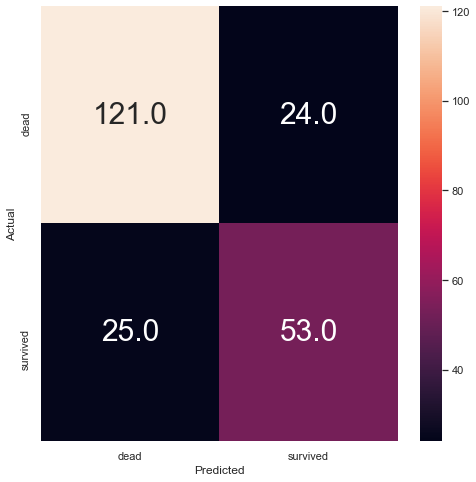

In [194]:
# Initalize our model
model_3 = LogisticRegression()

# Fit / Train our model using our training data.
model_3.fit(X_train, y_train)

# Make new predicitions using our testing data. 
y_pred = model_3.predict(X_test)

# Calculate our accuracy
accuracy_3 = accuracy_score(y_pred, y_test)

# Calculate our precision score
precision_3 = precision_score(y_pred, y_test)

# Calculate our recall score
recall_3 = recall_score(y_pred, y_test)

# Calculate your f1-score
f1_3 = f1_score(y_pred, y_test)

# Print each of our scores to inspect performance.
print("Accuracy Score: %f" % accuracy_3)
print("Precision Score: %f" % precision_3)
print("Recall Score: %f" % recall_3)
print('F1 Score %f' % f1_3)

# Plot your confusion matrix.
cm  = confusion_matrix(y_test, y_pred)

fig = plt.figure(figsize=(8,8))
hm = sns.heatmap(cm, annot = True, annot_kws={"size": 30},fmt= '.1f')

plt.xlabel('Predicted')
plt.ylabel('Actual')

hm.set_xticklabels(["dead", "survived"])
hm.set_yticklabels(["dead", "survived"])